## INTRODUCTION

- Machine learning is a branch of artificial intelligence (AI) that involves training computer algorithms to learn patterns from data, without being explicitly programmed to do so. In other words, instead of providing rules for the computer to follow, we give it examples of what we want it to learn, and the algorithm figures out the patterns that underlie the data.

- Machine learning is used to develop predictive models that can make accurate predictions about future outcomes based on past data. These models are used in a wide variety of applications, from natural language processing and computer vision to fraud detection and personalized recommendations.
- In this project, we will be using a Weather forcasting dataset to predict whether it will be diizzy, rainy, sun, fog,snow. We willbe exploring different machine learning algorithms such as decision tree, K-nearest neighbors (KNN),logistic regression, and support vector machine (SVM) to determine which algorithm performs best for this particular problem.
- Our goal is to build a predictive model that accurately identifies what will be the weather is , based on their tempreture information. This model will be valuable for weather forcasting team. By leveraging machine learning techniques, we can improve the accuracyand efficiency of these processes, and ultimately provide better service to our customers.

### PROBLEM STATMENT

* The problem statement for this machine learning project is to predict whether  it will be diizzy, rainy, sun, fog,snow. we aim to build a predictive model that accurately identifies what will be weather. This model will help weather forcasting team to make more informed lending decisions, and identify potential natural disaster. 
* To summarize the Problem statement we are bulding a Machine learning Model to predict weather there will be diizzy, rainy, sun, fog,snow .


### Firstly we have to import necessary Libraries for our Prediction

In [1]:
import pandas as pd 
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns 

import warnings
warnings.filterwarnings('ignore')

### Importing the Dataset from which Algorithm can be Trained

### Weather Forcasting Dataset

In [2]:
df = pd.read_csv(r'C:\Users\SHIVANI\Downloads\seattle-weather.csv')
df

,date,precipitation,temp_max,temp_min,wind,weather
0,2012-01-01,0.0,12.8,5.0,4.7,drizzle
1,2012-01-02,10.9,10.6,2.8,4.5,rain
2,2012-01-03,0.8,11.7,7.2,2.3,rain
3,2012-01-04,20.3,12.2,5.6,4.7,rain
4,2012-01-05,1.3,8.9,2.8,6.1,rain
...,...,...,...,...,...,...
1456,2015-12-27,8.6,4.4,1.7,2.9,rain
1457,2015-12-28,1.5,5.0,1.7,1.3,rain
1458,2015-12-29,0.0,7.2,0.6,2.6,fog
1459,2015-12-30,0.0,5.6,-1.0,3.4,sun


### Data Description

#### Given are the columns is the dataset

In [3]:
df.columns

Index(['date', 'precipitation', 'temp_max', 'temp_min', 'wind', 'weather'], dtype='object')

#### Now the next step is to check the null values in the data

In [4]:
df.isnull().sum()

date             0
precipitation    0
temp_max         0
temp_min         0
wind             0
weather          0
dtype: int64

#### Now the next step is to check the info of the data

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1461 entries, 0 to 1460
Data columns (total 6 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   date           1461 non-null   object 
 1   precipitation  1461 non-null   float64
 2   temp_max       1461 non-null   float64
 3   temp_min       1461 non-null   float64
 4   wind           1461 non-null   float64
 5   weather        1461 non-null   object 
dtypes: float64(4), object(2)
memory usage: 68.6+ KB


#### Here all the columns are not in integer so we will apply ordinal encoder to that columns

In [6]:
from sklearn.preprocessing import OrdinalEncoder
oe = OrdinalEncoder()

In [7]:
oe.fit_transform(df[['weather','date']])

array([[0.000e+00, 0.000e+00],
       [2.000e+00, 1.000e+00],
       [2.000e+00, 2.000e+00],
       ...,
       [1.000e+00, 1.458e+03],
       [4.000e+00, 1.459e+03],
       [4.000e+00, 1.460e+03]])

In [8]:
df.select_dtypes('object').columns

Index(['date', 'weather'], dtype='object')

In [9]:
dw = df.select_dtypes('object').columns

In [10]:
oe.fit_transform(df[dw])

array([[0.000e+00, 0.000e+00],
       [1.000e+00, 2.000e+00],
       [2.000e+00, 2.000e+00],
       ...,
       [1.458e+03, 1.000e+00],
       [1.459e+03, 4.000e+00],
       [1.460e+03, 4.000e+00]])

In [11]:
df[dw]= oe.fit_transform(df[dw])

In [12]:
df

,date,precipitation,temp_max,temp_min,wind,weather
0,0.0,0.0,12.8,5.0,4.7,0.0
1,1.0,10.9,10.6,2.8,4.5,2.0
2,2.0,0.8,11.7,7.2,2.3,2.0
3,3.0,20.3,12.2,5.6,4.7,2.0
4,4.0,1.3,8.9,2.8,6.1,2.0
...,...,...,...,...,...,...
1456,1456.0,8.6,4.4,1.7,2.9,2.0
1457,1457.0,1.5,5.0,1.7,1.3,2.0
1458,1458.0,0.0,7.2,0.6,2.6,1.0
1459,1459.0,0.0,5.6,-1.0,3.4,4.0


### Now we will build some insights from the data through various graphical representation

#### count plot

##### This Graph represents on which day most of the deposits are made

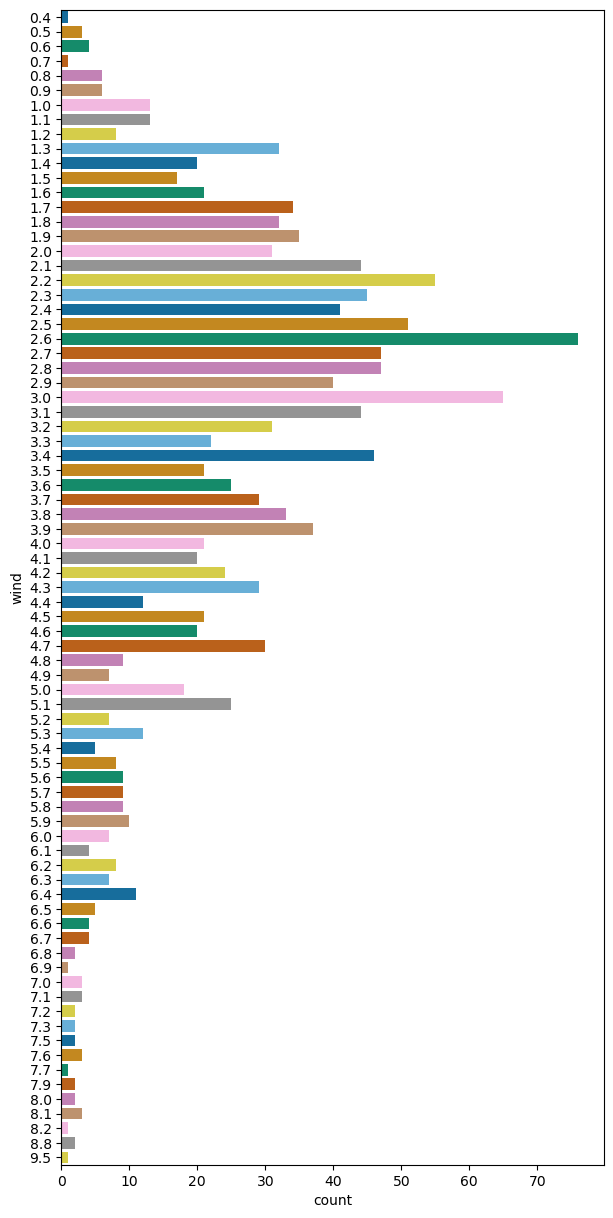

In [13]:
plt.figure(figsize= (7,15))
sns.countplot(y =df['wind'],data = df,dodge=False,palette='colorblind')
plt.show()

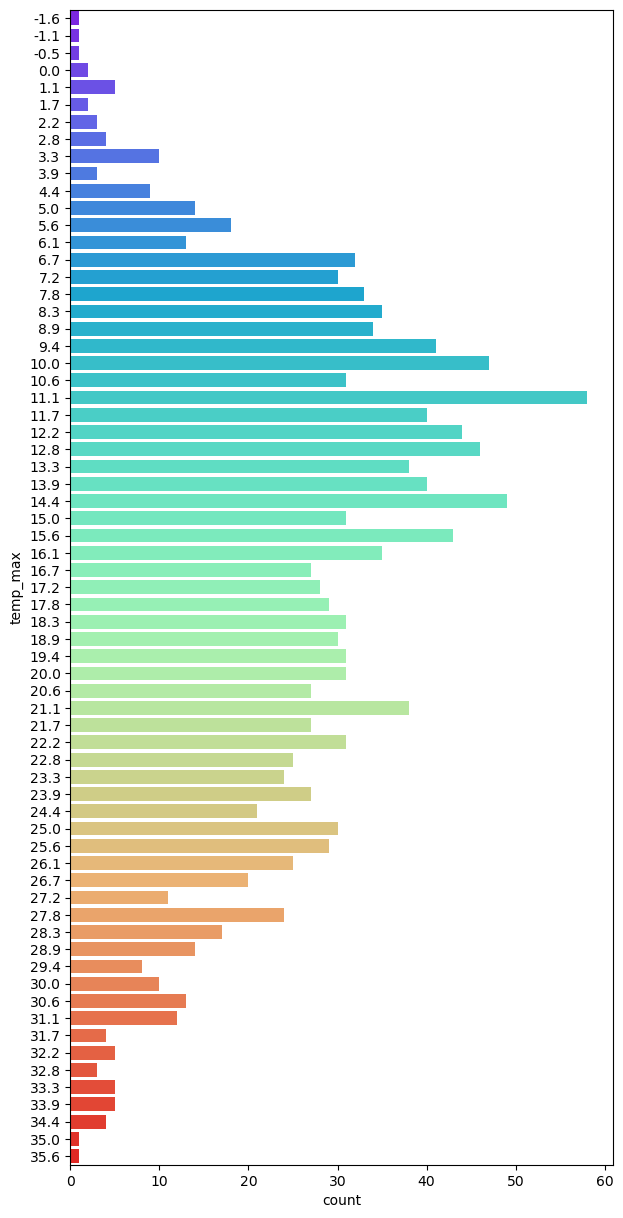

In [14]:
plt.figure(figsize = (7,15))
sns.countplot(y = df['temp_max'],data=df,dodge=False,palette='rainbow')
plt.show()

### Regression Line

<Figure size 600x700 with 0 Axes>

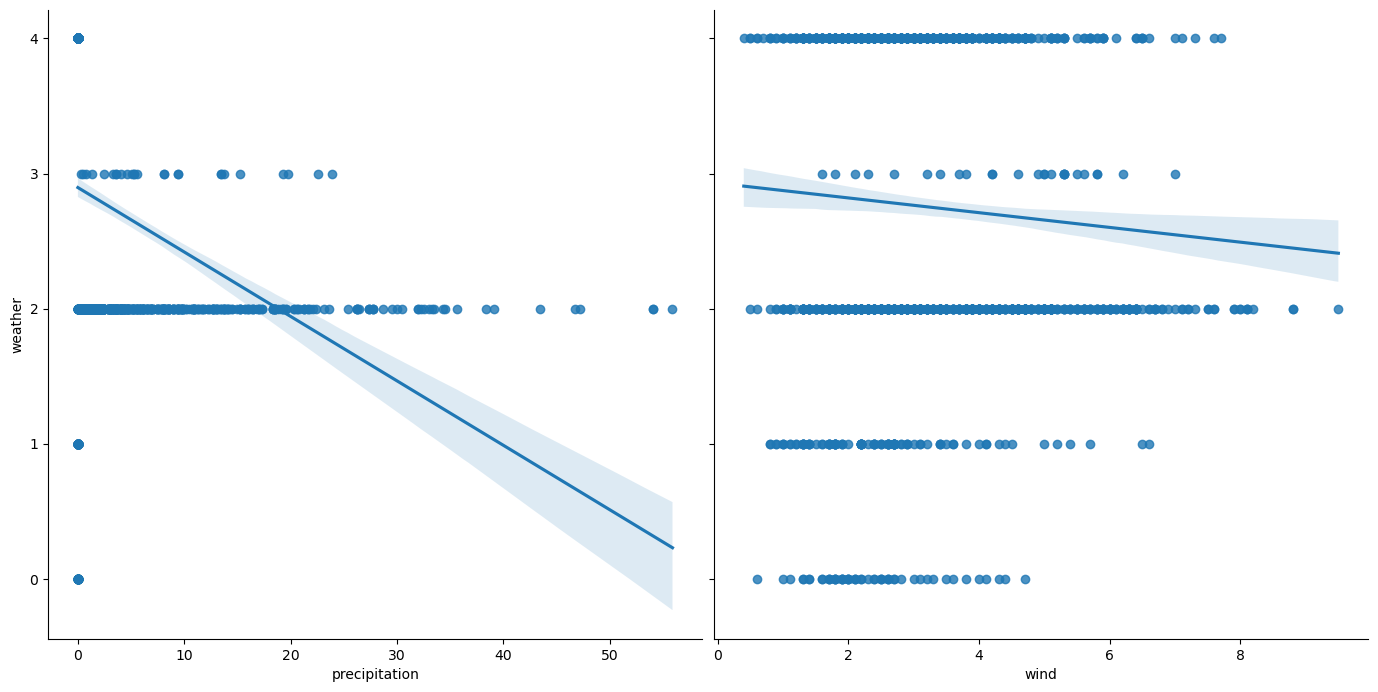

In [15]:
plt.figure(figsize = (6,7))
sns.pairplot(x_vars=['precipitation','wind'],data=df,y_vars='weather',kind='reg',size = 7)
plt.show()

<Figure size 600x700 with 0 Axes>

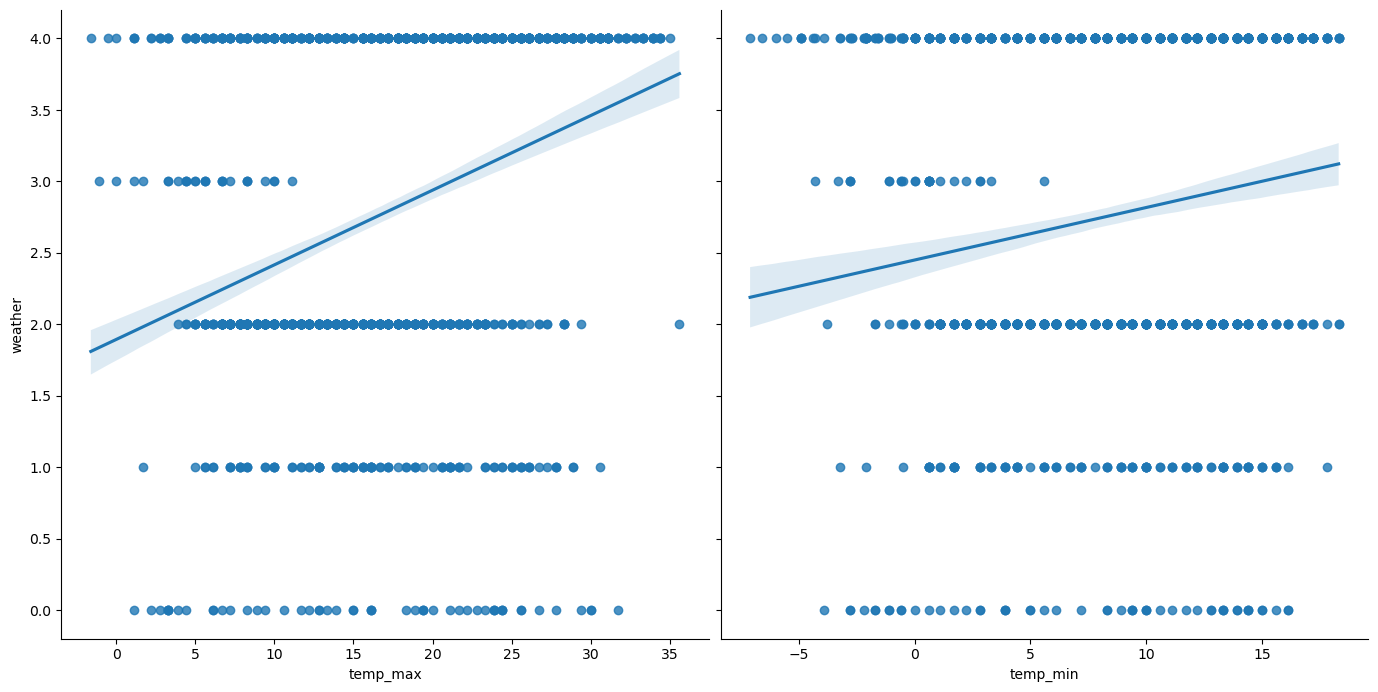

In [16]:
plt.figure(figsize = (6,7))
sns.pairplot(x_vars=['temp_max','temp_min'],data=df,y_vars='weather',kind='reg',size = 7)
plt.show()

### Pie Chart

An infromation that provides ratio between wind flow

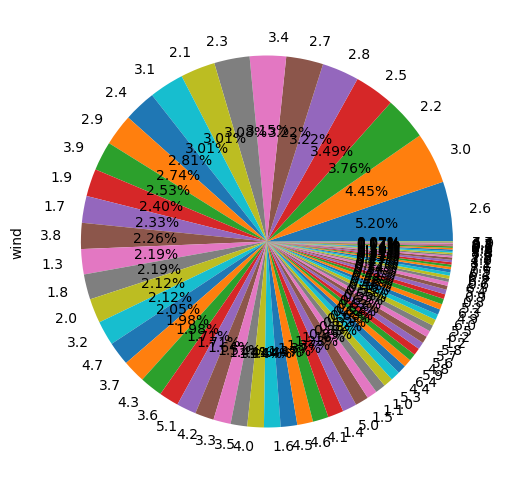

In [17]:
plt.figure(figsize = (6,7))
df['wind'].value_counts().plot(kind = 'pie',autopct = '%1.2f%%')
plt.show()

Here it shows us maximum Tempreture show

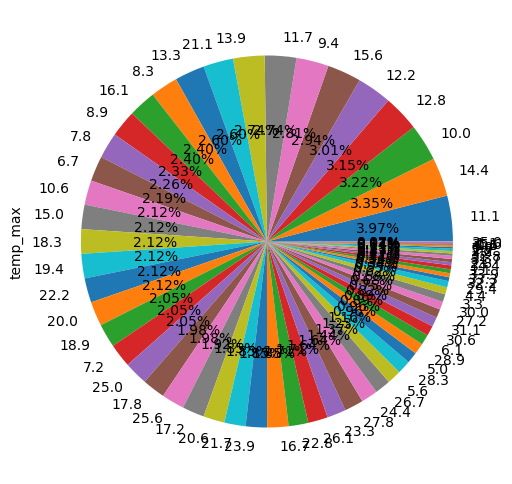

In [18]:
plt.figure(figsize = (6,7))
df['temp_max'].value_counts().plot(kind = 'pie',autopct = '%1.2f%%')
plt.show()

### Correlation

In [19]:
df.corr()

,date,precipitation,temp_max,temp_min,wind,weather
date,1.000000,0.014292,0.145827,0.164249,-0.039163,0.067043
precipitation,0.014292,1.000000,-0.228555,-0.072684,0.328045,-0.267388
temp_max,0.145827,-0.228555,1.000000,0.875687,-0.164857,0.322337
temp_min,0.164249,-0.072684,0.875687,1.000000,-0.074185,0.154981
wind,-0.039163,0.328045,-0.164857,-0.074185,1.000000,-0.065858
weather,0.067043,-0.267388,0.322337,0.154981,-0.065858,1.000000


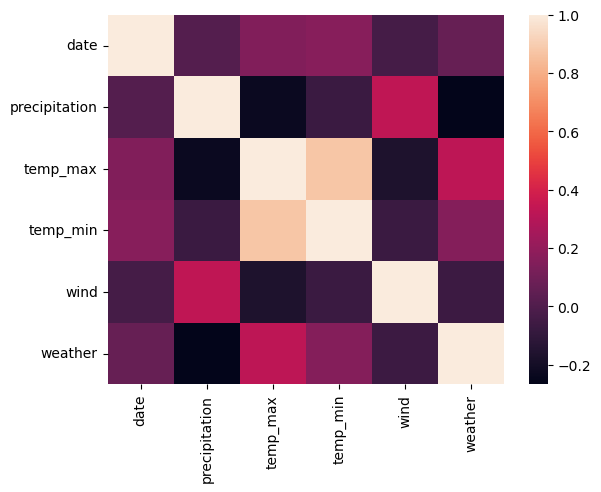

In [20]:
sns.heatmap(df.corr())
plt.show()

### So the conclusion is that no columns will be removed as every column in the data have some information which will be helpful in future prediction

### Training Process

#### we will now split the features and target 

In [21]:
x = df.iloc[:,1:5]
x

,precipitation,temp_max,temp_min,wind
0,0.0,12.8,5.0,4.7
1,10.9,10.6,2.8,4.5
2,0.8,11.7,7.2,2.3
3,20.3,12.2,5.6,4.7
4,1.3,8.9,2.8,6.1
...,...,...,...,...
1456,8.6,4.4,1.7,2.9
1457,1.5,5.0,1.7,1.3
1458,0.0,7.2,0.6,2.6
1459,0.0,5.6,-1.0,3.4


In [22]:
y = df.iloc[:,-1]
y

0       0.0
1       2.0
2       2.0
3       2.0
4       2.0
       ... 
1456    2.0
1457    2.0
1458    1.0
1459    4.0
1460    4.0
Name: weather, Length: 1461, dtype: float64

### now we will perform Train test split

In [23]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test = train_test_split(x,y,test_size=0.3,random_state=42)

In the above code i have just imported the train_test_split model and
applied the model to the dataset in 70 : 30 ratio so that the machine will take learnings from 70 % of the
data and make a testing on 30 % of the data and hence make a optimum conclusion

### Algorithms

now we will import algorithms

In [24]:
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.svm import SVC

In [25]:
#now we will assign variable to those algorithms
logreg = LogisticRegression()
knn = KNeighborsClassifier()
dt = DecisionTreeClassifier()
svm = SVC()

In [26]:
#for accuracy we will import classification report and accuracy score
from sklearn.metrics import classification_report,accuracy_score

### Building a Class named Mymodel so that the accuracies can be easily predicted

In [27]:
def mymodel(model):
    model.fit(X_train,y_train)
    y_pred = model.predict(X_test)
    print('Accuracy score :',accuracy_score(y_test,y_pred))
    print(classification_report(y_test,y_pred))
    
    train = model.score(X_train,y_train)
    test  = model.score(X_test,y_test)
    print('Training performance :',train)
    print('testing performance :',test)

#### Applying diffrent algorithms on the Class to check accuracy of each and finding the best and most accurate Algorithm for Prediction


### Logistic Regression

In [28]:
mymodel(logreg)

Accuracy score : 0.8451025056947609
              precision    recall  f1-score   support

         0.0       0.00      0.00      0.00        14
         1.0       0.00      0.00      0.00        32
         2.0       0.96      0.92      0.94       192
         3.0       1.00      0.12      0.22         8
         4.0       0.76      1.00      0.86       193

    accuracy                           0.85       439
   macro avg       0.54      0.41      0.41       439
weighted avg       0.77      0.85      0.80       439

Training performance : 0.8463796477495108
testing performance : 0.8451025056947609


### KNeighbors 

In [29]:
mymodel(knn)

Accuracy score : 0.7585421412300684
              precision    recall  f1-score   support

         0.0       0.14      0.07      0.10        14
         1.0       0.17      0.12      0.15        32
         2.0       0.89      0.86      0.88       192
         3.0       1.00      0.12      0.22         8
         4.0       0.73      0.83      0.78       193

    accuracy                           0.76       439
   macro avg       0.59      0.40      0.42       439
weighted avg       0.74      0.76      0.74       439

Training performance : 0.8131115459882583
testing performance : 0.7585421412300684


In [30]:
mymodel(dt)

Accuracy score : 0.7425968109339408
              precision    recall  f1-score   support

         0.0       0.05      0.07      0.06        14
         1.0       0.24      0.28      0.26        32
         2.0       0.90      0.90      0.90       192
         3.0       0.33      0.38      0.35         8
         4.0       0.79      0.73      0.76       193

    accuracy                           0.74       439
   macro avg       0.46      0.47      0.46       439
weighted avg       0.76      0.74      0.75       439

Training performance : 0.99706457925636
testing performance : 0.7425968109339408


### SVM

In [31]:
mymodel(svm)

Accuracy score : 0.7722095671981777
              precision    recall  f1-score   support

         0.0       0.00      0.00      0.00        14
         1.0       0.00      0.00      0.00        32
         2.0       0.90      0.80      0.85       192
         3.0       0.00      0.00      0.00         8
         4.0       0.69      0.96      0.80       193

    accuracy                           0.77       439
   macro avg       0.32      0.35      0.33       439
weighted avg       0.70      0.77      0.72       439

Training performance : 0.7808219178082192
testing performance : 0.7722095671981777


### Decision Tree

In [32]:
mymodel(dt)

Accuracy score : 0.7334851936218679
              precision    recall  f1-score   support

         0.0       0.05      0.07      0.06        14
         1.0       0.24      0.28      0.26        32
         2.0       0.89      0.89      0.89       192
         3.0       0.30      0.38      0.33         8
         4.0       0.78      0.72      0.75       193

    accuracy                           0.73       439
   macro avg       0.45      0.47      0.46       439
weighted avg       0.76      0.73      0.74       439

Training performance : 0.99706457925636
testing performance : 0.7334851936218679


In [33]:
for i in range(1,51):    #1
    dt1 =DecisionTreeClassifier(max_depth=i)
    dt1.fit(X_train,y_train)
    y_pred = dt1.predict(X_test)
    ac = accuracy_score(y_test,y_pred)
    print(f"Max depth={i}    Accuracy = {ac}")

Max depth=1    Accuracy = 0.8428246013667426
Max depth=2    Accuracy = 0.8405466970387244
Max depth=3    Accuracy = 0.8428246013667426
Max depth=4    Accuracy = 0.8405466970387244
Max depth=5    Accuracy = 0.835990888382688
Max depth=6    Accuracy = 0.8314350797266514
Max depth=7    Accuracy = 0.8223234624145785
Max depth=8    Accuracy = 0.8041002277904328
Max depth=9    Accuracy = 0.8041002277904328
Max depth=10    Accuracy = 0.7972665148063781
Max depth=11    Accuracy = 0.7972665148063781
Max depth=12    Accuracy = 0.7881548974943052
Max depth=13    Accuracy = 0.7699316628701595
Max depth=14    Accuracy = 0.7790432801822323
Max depth=15    Accuracy = 0.7608200455580866
Max depth=16    Accuracy = 0.7539863325740319
Max depth=17    Accuracy = 0.7539863325740319
Max depth=18    Accuracy = 0.7471526195899773
Max depth=19    Accuracy = 0.7471526195899773
Max depth=20    Accuracy = 0.724373576309795
Max depth=21    Accuracy = 0.7357630979498861
Max depth=22    Accuracy = 0.7312072892938497

In [34]:
for i in range(2,51):    #33
    dt1 =DecisionTreeClassifier(min_samples_split=i)
    dt1.fit(X_train,y_train)
    y_pred = dt1.predict(X_test)
    ac = accuracy_score(y_test,y_pred)
    print(f"Min Sample split={i}    Accuracy = {ac}")

Min Sample split=2    Accuracy = 0.7403189066059226
Min Sample split=3    Accuracy = 0.724373576309795
Min Sample split=4    Accuracy = 0.7425968109339408
Min Sample split=5    Accuracy = 0.7539863325740319
Min Sample split=6    Accuracy = 0.7471526195899773
Min Sample split=7    Accuracy = 0.7539863325740319
Min Sample split=8    Accuracy = 0.7676537585421412
Min Sample split=9    Accuracy = 0.7744874715261959
Min Sample split=10    Accuracy = 0.7790432801822323
Min Sample split=11    Accuracy = 0.7904328018223234
Min Sample split=12    Accuracy = 0.7927107061503417
Min Sample split=13    Accuracy = 0.7995444191343963
Min Sample split=14    Accuracy = 0.7995444191343963
Min Sample split=15    Accuracy = 0.8109339407744874
Min Sample split=16    Accuracy = 0.8132118451025057
Min Sample split=17    Accuracy = 0.8109339407744874
Min Sample split=18    Accuracy = 0.8154897494305239
Min Sample split=19    Accuracy = 0.8223234624145785
Min Sample split=20    Accuracy = 0.8109339407744874
Mi

In [35]:
for i in range(1,51):   #9
    dt1 =DecisionTreeClassifier(min_samples_leaf=i)
    dt1.fit(X_train,y_train)
    y_pred = dt1.predict(X_test)
    ac = accuracy_score(y_test,y_pred)
    print(f"Min Sample leaf={i}    Accuracy = {ac}")

Min Sample leaf=1    Accuracy = 0.7312072892938497
Min Sample leaf=2    Accuracy = 0.7562642369020501
Min Sample leaf=3    Accuracy = 0.7790432801822323
Min Sample leaf=4    Accuracy = 0.765375854214123
Min Sample leaf=5    Accuracy = 0.7995444191343963
Min Sample leaf=6    Accuracy = 0.8314350797266514
Min Sample leaf=7    Accuracy = 0.8314350797266514
Min Sample leaf=8    Accuracy = 0.8337129840546698
Min Sample leaf=9    Accuracy = 0.8382687927107062
Min Sample leaf=10    Accuracy = 0.835990888382688
Min Sample leaf=11    Accuracy = 0.8314350797266514
Min Sample leaf=12    Accuracy = 0.835990888382688
Min Sample leaf=13    Accuracy = 0.835990888382688
Min Sample leaf=14    Accuracy = 0.835990888382688
Min Sample leaf=15    Accuracy = 0.8382687927107062
Min Sample leaf=16    Accuracy = 0.8405466970387244
Min Sample leaf=17    Accuracy = 0.8405466970387244
Min Sample leaf=18    Accuracy = 0.8405466970387244
Min Sample leaf=19    Accuracy = 0.8405466970387244
Min Sample leaf=20    Accu

In [36]:
dt = DecisionTreeClassifier(criterion='entropy',max_depth=1,min_samples_split=33,min_samples_leaf=9)

In [37]:
mymodel(dt)

Accuracy score : 0.8428246013667426
              precision    recall  f1-score   support

         0.0       0.00      0.00      0.00        14
         1.0       0.00      0.00      0.00        32
         2.0       0.96      0.92      0.94       192
         3.0       0.00      0.00      0.00         8
         4.0       0.76      1.00      0.86       193

    accuracy                           0.84       439
   macro avg       0.34      0.38      0.36       439
weighted avg       0.75      0.84      0.79       439

Training performance : 0.8483365949119374
testing performance : 0.8428246013667426


In [38]:
dt = DecisionTreeClassifier(max_depth=1,min_samples_split=33,min_samples_leaf=9)

In [39]:
mymodel(dt)

Accuracy score : 0.8428246013667426
              precision    recall  f1-score   support

         0.0       0.00      0.00      0.00        14
         1.0       0.00      0.00      0.00        32
         2.0       0.96      0.92      0.94       192
         3.0       0.00      0.00      0.00         8
         4.0       0.76      1.00      0.86       193

    accuracy                           0.84       439
   macro avg       0.34      0.38      0.36       439
weighted avg       0.75      0.84      0.79       439

Training performance : 0.8483365949119374
testing performance : 0.8428246013667426


### BEST module

In [40]:
mymodel(logreg)

Accuracy score : 0.8451025056947609
              precision    recall  f1-score   support

         0.0       0.00      0.00      0.00        14
         1.0       0.00      0.00      0.00        32
         2.0       0.96      0.92      0.94       192
         3.0       1.00      0.12      0.22         8
         4.0       0.76      1.00      0.86       193

    accuracy                           0.85       439
   macro avg       0.54      0.41      0.41       439
weighted avg       0.77      0.85      0.80       439

Training performance : 0.8463796477495108
testing performance : 0.8451025056947609


## Conclusion

- In this machine learning project, we explored the use of different algorithms such as decision tree, Knearest neighbors (KNN), logistic regression, and support vector machine (SVM) to predict whether a weather will be dizzy, suny, rainy, fog,snow. We used a Weather forcasting dataset containing tempreture information to train and test our models.
- Through our experimentation, we found that logistic Regression algorithm performed the best with the highest accuracy score. This model can be used by weather forcasting team to identify potential risk of natural disaster or other circumstances.
